In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
class Const:
     def __init__(self):
        self.n_steps = 100
        self.n_animals_max = 100
        self.n_animals_start = 10
        self.vmin = 0.01
        self.vmax = 0.05
        
        self.hp_baby = 10
        self.hp_food = 5
        self.hp_reproduct = 30 
        self.hp_leak = 1
        self.hp_birthcost = 10
        
        self.food_rate = 1
        self.eating_distance = 0.05
        self.n_food_start = 20
        self.n_food_max = 1000

In [3]:
def model(c, show_dotses=False, n_trials=1):
    history = np.zeros((c.n_steps, n_trials))

    for i_trial in range(n_trials):
        hp = np.zeros(c.n_animals_max)
        hp[:c.n_animals_start] = np.random.uniform(
            low=c.hp_baby, high=c.hp_reproduct, size=c.n_animals_start)
        x = np.random.uniform(size=c.n_animals_max)
        y = np.random.uniform(size=c.n_animals_max)
        
        vx = np.random.uniform(size=c.n_animals_max, low=c.vmin, high=c.vmax)*(
            2*np.random.randint(size=c.n_animals_max,low=0,high=2) - 1)
        vy = np.random.uniform(size=c.n_animals_max, low=c.vmin, high=c.vmax)*(
            2*np.random.randint(size=c.n_animals_max,low=0,high=2) - 1)
    
        foodx = np.ones(c.n_food_max)*-1
        foodx[:c.n_food_start] = np.random.uniform(size=c.n_food_start)
        foody = np.random.uniform(size=c.n_food_max)
        
        n_animals = np.zeros(c.n_steps)
        
        if show_dotses: # Plotting preparation
            fig = plt.figure(figsize=(3,3))
            ax = plt.subplot(111) # No subplots actually, just creating axes
            plt.xlim((0,1));
            plt.ylim((0,1));
            fig.show()
            fig.canvas.draw()

        for t in range(c.n_steps):
            x += vx
            y += vy

            # Reflect from the walls
            vx = np.where(np.logical_or(x>1,x<0), -vx , vx)
            vy = np.where(np.logical_or(y>1,y<0), -vy , vy)
            
            for i_animal in range(c.n_animals_max):
                if hp[i_animal]<=0:
                    continue
                # for i_food in range(c.n_food_max):
                #   d = np.sqrt((x[i_animal]-foodx[i_food])**2+(y[i_animal]-foody[i_food])**2)
                #   if d < c.eating_distance:                     
                #       hp += c.hp.food
                #       foodx[i_food] = -1
                d = np.sqrt((x[i_animal]-foodx)**2 + (y[i_animal]-foody)**2)
                print(d)
                eaten_food = d < c.eating_distance
                foodx[eaten_food] = -1
                hp[i_animal] += c.hp_food*sum(eaten_food)
                
            potential_cabbage = np.argwhere(foodx<0)
            if potential_cabbage.size !=0:
                foodx[potential_cabbage[0]] = np.random.uniform()
                foody[potential_cabbage[0]] = np.random.uniform()
                
            
            hp -= c.hp_leak
            n_animals[t] = np.sum(hp>0)
            
            if show_dotses: # Actual animation
                ax.clear()
                plt.plot(x[hp>0], y[hp>0], 'r.',markersize=5);
                plt.plot(foodx,foody,'g.',markersize=1)
                plt.xlim((0,1));
                plt.ylim((0,1));
                fig.canvas.draw() # Redraws the canvas (key secret command to animate things)
        # The time loop is over

        history[:,i_trial] = n_animals
    return np.mean(history, axis=1)

<IPython.core.display.Javascript object>


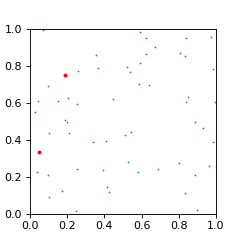

[0.30778801 0.68528553 0.85637926 1.07502796 0.46103847 0.63076607
 0.07865241 0.80045862 0.77777185 0.15178549 0.59122745 0.58589303
 0.21592112 0.52812896 0.59989625 0.59880788 0.21998503 0.40654082
 0.10607233 0.66467961 1.23398282 1.15445808 1.38099522 1.23154215
 1.18880283 1.21832171 1.15191848 1.30354967 1.17938193 1.15561474
 1.16489392 1.33848619 1.15828884 1.28667822 1.24968086 1.36350153
 1.26445359 1.16864116 1.16507625 1.15158674 1.29677516 1.32356778
 1.16732821 1.17367506 1.25381448 1.19121753 1.19204039 1.24417503
 1.15191629 1.21239221 1.31510679 1.16158804 1.22880418 1.16418868
 1.18373305 1.1552396  1.16357055 1.15164932 1.1627127  1.24911127
 1.27420012 1.2281809  1.15398931 1.29981212 1.15507665 1.29444436
 1.32634285 1.33644669 1.30188751 1.17962479 1.32635397 1.21192877
 1.24707125 1.15300429 1.34929904 1.15446195 1.22887615 1.29649814
 1.15568396 1.15171416 1.32993436 1.33599783 1.17069372 1.17725349
 1.24481291 1.20317101 1.18212863 1.25247227 1.21233117 1.1587

[0.5889435  0.53388244 0.64401242 0.39874503 0.4299188  0.30430249
 0.74004879 0.53469774 0.29217302 0.73838561 0.26931952 0.67743703
 0.71402217 0.33569881 0.87224838 1.70696704 0.74320926 0.52729436
 0.71326689 0.86635472 1.56278787 1.66553874 1.53856615 1.56401556
 1.59576298 1.57153107 1.71037133 1.54191456 1.60706053 1.74153377
 1.63171024 1.5384812  1.75485177 1.5449787  1.55588921 1.53803151
 1.55074387 1.79191356 1.63130796 1.69915023 1.54302222 1.53951099
 1.7878908  1.61537442 1.55432957 1.59323535 1.59240279 1.55812472
 1.71033143 1.57544777 1.54037586 1.63969879 1.56544833 1.77766269
 1.60152722 1.66156696 1.77552815 1.70361605 1.77248717 1.55611192
 1.54794961 1.56578297 1.66821605 1.54250607 1.73841037 1.54344052
 1.53927283 1.53858647 1.54217175 1.60673527 1.53927192 1.57577019
 1.55692555 1.67497848 1.53810079 1.73456015 1.56540989 1.54307092
 1.74192144 1.70581184 1.53899684 1.53861111 1.62033325 1.61000409
 1.55785608 1.5823642  1.60349796 1.55482525 1.57549009 1.7569

 1.4976     1.50495836 1.49133233 1.52973828]
[0.00965271 0.37474702 0.55206468 0.77353284 0.38441644 0.50407906
 0.2621657  0.64629157 0.47418031 0.34252983 0.31771117 0.31607392
 0.37431097 1.44716125 0.4174349  1.43833048 0.16531199 0.0912299
 0.22212718 0.45734088 1.45756989 1.42979667 1.55314529 1.45621635
 1.43526659 1.4491203  1.43928304 1.50008829 1.43177729 1.44944875
 1.42827307 1.52345789 1.45450476 1.48921053 1.46655022 1.54078025
 1.47537567 1.47046263 1.42829382 1.43627407 1.49568513 1.51335138
 1.46860781 1.43004169 1.46898616 1.43625634 1.43660112 1.46334963
 1.43927168 1.44608512 1.50770158 1.42807184 1.45471312 1.46402065
 1.43330734 1.42932281 1.46308738 1.43742619 1.46177255 1.46621674
 1.48136733 1.45437324 1.43015449 1.49765337 1.44832081 1.49418093
 1.5152177  1.52206581 1.49900374 1.43185846 1.5152252  1.44585226
 1.46502679 1.4311897  1.53089058 1.44696197 1.45475243 1.49550606
 1.44959032 1.43801496 1.51764255 1.52175987 1.42929215 1.43108972
 1.46371776 1.441

[0.75806432 0.66503344 0.80658048 1.13029381 0.66490282 0.82285097
 0.29811517 0.8902158  0.83376444 0.3968262  0.690897   0.59934426
 0.46079635 0.64765853 0.44472789 1.31054078 0.20790316 0.4453061
 0.29382544 0.51889841 1.44825287 1.32812514 1.61504126 1.44523562
 1.38894909 1.4286067  1.3094996  1.52983305 1.37505242 1.30232812
 1.35110448 1.56876042 1.30043558 1.51064775 1.46733704 1.59611559
 1.48487064 1.29833431 1.35143863 1.31314317 1.52216428 1.552254
 1.29835452 1.36611512 1.47228052 1.39238178 1.39354149 1.46070254
 1.30951149 1.42096609 1.54281838 1.34479823 1.44183266 1.29862525
 1.38158172 1.33035914 1.29872253 1.31161968 1.29888607 1.4666534
 1.49625443 1.44105521 1.32667998 1.52560763 1.30286783 1.51951532
 1.55533661 1.56651301 1.52795556 1.37542264 1.55534896 1.42036341
 1.46419984 1.32323816 1.58063063 1.30358529 1.44192237 1.52184974
 1.30226374 1.3109066  1.5593177  1.56601801 1.36122779 1.37177482
 1.46147425 1.40880374 1.37919867 1.47067872 1.42088676 1.30019295

[0.7853187  0.08891243 0.20902786 0.594059   0.65507252 0.70358965
 0.60928696 0.90997804 0.35017795 0.69518324 0.38096709 0.59999261
 0.72520072 0.11876512 0.29304263 0.44054446 0.44112363 0.27378128
 0.56938325 0.26530169 1.80280859 1.78240557 1.87927252 1.80175136
 1.78563232 1.7962313  1.79061694 1.83646828 1.78305033 1.79916983
 1.78066912 1.85523204 1.80339668 1.82779006 1.80985127 1.8692337
 1.81681265 1.81669072 1.78067917 1.78805771 1.83295085 1.84709862
 1.81514758 1.78180932 1.81176908 1.7863758  1.78663558 1.80733603
 1.79060731 1.79388416 1.84256406 1.78063594 1.80057869 1.81132956
 1.78417312 1.78196857 1.81055241 1.78904009 1.80945727 1.80958894
 1.82155788 1.80031378 1.7827305  1.83452241 1.79822512 1.83175065
 1.84859851 1.85411013 1.83560133 1.78310938 1.84860453 1.79370451
 1.80865338 1.78365524 1.86123073 1.79708598 1.80060933 1.83280793
 1.79928835 1.78954085 1.85054868 1.85386363 1.78129511 1.78255312
 1.80762506 1.79042531 1.78374377 1.81114367 1.79386047 1.80409

[0.43758281 0.50563909 0.68444176 0.87135703 0.32903255 0.48048494
 0.13706642 0.57506442 0.57472263 0.20940938 0.38834697 0.26078908
 0.2439452  0.46497746 0.52002391 0.14729289 0.16699902 0.21930415
 0.09941387 0.569654   0.17718179 1.29666904 1.43479211 1.32757968
 1.30382253 1.31959047 1.30654963 1.37642895 1.29976638 1.3173821
 1.29548742 1.40221061 1.32279773 1.36438044 1.33915674 1.42124267
 1.34900335 1.3399435  1.29551667 1.3033711  1.37155592 1.39107693
 1.33794804 1.29770682 1.34187785 1.30496233 1.3053586  1.33557721
 1.3065376  1.31615999 1.38484256 1.29514131 1.32589037 1.33301533
 1.30155413 1.29620163 1.33201223 1.30458571 1.33059931 1.338784
 1.35567093 1.3255082  1.29702688 1.37373486 1.31617577 1.36988998
 1.39313469 1.40067841 1.37522915 1.29986172 1.39314295 1.31589641
 1.33745355 1.29807707 1.41038444 1.31472361 1.32593456 1.37135763
 1.31753357 1.30520765 1.39580706 1.40034162 1.29679631 1.2989559
 1.33598918 1.31105461 1.30087607 1.34099123 1.31612524 1.32370017

[0.72363814 0.49044957 0.62948451 0.61008611 0.61064096 0.74819818
 0.31878438 0.86130076 0.67580912 0.42980105 0.55752677 0.54121601
 0.4868667  0.47649655 0.29393814 0.38836592 0.1204747  0.30010626
 1.4566289  0.36324336 0.14595798 0.45618363 1.68234152 1.5411752
 1.49791049 1.528114   1.44684922 1.61007311 1.48774172 1.44508545
 1.47096926 1.64280164 1.44530372 1.5941514  1.55881689 1.66609744
 1.57301043 1.44852236 1.47119491 1.44836752 1.60369103 1.62885912
 1.44800199 1.48135471 1.56280207 1.50046096 1.50132576 1.55349016
 1.44685373 1.52218255 1.62093096 1.46676668 1.53848644 1.44685914
 1.4924865  1.45764775 1.44665417 1.44770202 1.44638269 1.55826684
 1.58230894 1.53787327 1.45547432 1.60655379 1.44511359 1.60149195
 1.63145598 1.64089803 1.60850851 1.48800907 1.63146639 1.52171671
 1.55629493 1.45351609 1.65288248 1.4451915  1.53855722 1.60342976
 1.44508411 1.44740484 1.63481452 1.64047898 1.47792165 1.4853841
 1.55410844 1.51284308 1.49074763 1.5615093  1.52212122 1.445387

 1.1581917  1.15150256 1.17827361 1.31128213]
[0.93946886 0.4028447  0.45967344 0.82747036 0.8128385  0.91293143
 1.88509945 1.07598327 0.65859563 0.71051083 0.63403505 0.7456368
 0.76168449 0.42313268 1.73625889 1.78819285 0.39264577 0.41198766
 1.75174608 0.0861143  0.43655249 0.70240249 1.96096809 1.83236483
 1.79216224 1.82031991 1.74039942 1.89531476 1.78252626 1.73694346
 1.76630334 1.92506229 1.73631321 1.88082129 1.84855722 1.94621822
 1.86153853 1.73683617 1.76652562 1.74241341 1.88950751 1.91239502
 1.7366301  1.77640856 1.85220558 1.79456319 1.79537606 1.84367575
 1.7404058  1.81482905 1.90518887 1.76213482 1.82988983 1.73626365
 1.78703622 1.75282132 1.73621645 1.74155848 1.73616713 1.84805342
 1.87002626 1.8293251  1.75051514 1.89211277 1.73716038 1.88750582
 1.91475484 1.92333312 1.89389134 1.78278111 1.91476429 1.81439717
 1.84624681 1.74839044 1.93421807 1.73746541 1.82995501 1.88926971
 1.73691841 1.74116432 1.91780645 1.92295246 1.77309314 1.78027491
 1.84424265 1.806

[1.00097301 0.44238015 0.47774587 0.88900491 0.87422956 0.97288382
 0.75770982 1.13743402 0.70277049 0.7684255  1.89298357 0.80710745
 0.8205628  0.46767389 1.78129013 1.84148827 0.45009577 0.47232157
 1.80146784 0.09428723 0.49145392 0.76333317 2.0200061  1.88800676
 1.84572245 1.87542882 1.78775403 1.95300301 1.8354166  1.78273244
 1.8177978  1.98343355 1.78144204 1.93812235 1.9048287  2.00500035
 1.91825583 1.78015266 1.8180423  1.7903399  1.94704542 1.97049201
 1.78014165 1.82881951 1.90860718 1.8482768  1.84914052 1.89976674
 1.78776244 1.86967298 1.9631192  1.81319094 1.8854272  1.78027289
 1.84025167 1.80270284 1.78032989 1.78925681 1.78042922 1.90430662
 1.9270111  1.88483827 1.80004563 1.94971888 1.78310492 1.94499045
 1.97290467 1.98166827 1.9515433  1.83569042 1.97291434 1.86921961
 1.9024338  1.79756641 1.99277395 1.78360211 1.88549516 1.94680132
 1.78268811 1.78875073 1.97602341 1.98127961 1.82522265 1.83299435
 1.900355   1.8605422  1.8384855  1.90738224 1.86961331 1.7812

[0.66344553 0.24868932 0.40733491 0.55464084 0.53408462 0.62570912
 0.4537003  0.79758148 0.43574611 0.50736939 0.4091933  0.46952809
 0.5439714  0.23009624 0.35180019 1.60194083 0.24314516 0.12612035
 1.59190496 0.29587508 0.30517661 0.4548134  1.72440833 1.62718549
 1.60384849 1.61958163 1.59687858 1.67203755 1.59939663 1.60380186
 1.59366453 1.69524476 1.60745909 1.66112146 1.63800364 1.71229486
 1.64708392 1.61950263 1.59372279 1.59502259 1.66762952 1.68524266
 1.61807356 1.59692704 1.64052208 1.60504729 1.60546037 1.6346782
 1.59687134 1.61626468 1.67962974 1.59271169 1.62558924 1.61456826
 1.60140357 1.59184848 1.61386061 1.59571697 1.61286709 1.63765805
 1.65318837 1.62522735 1.59202344 1.66960161 1.60300104 1.66612048
 1.68709323 1.69386973 1.67095304 1.5995061  1.68710066 1.61600818
 1.63642323 1.59238509 1.70257357 1.60204489 1.62563107 1.66744996
 1.60390281 1.59608011 1.68949513 1.69356743 1.59573076 1.59845147
 1.63506171 1.61124432 1.60065274 1.63970234 1.61623088 1.60807

[0.90496661 0.42431903 0.50143549 0.79192917 1.78477113 0.88968686
 0.65292534 1.04238141 0.67087525 0.65868672 0.31064364 0.7861243
 0.71174728 0.43743424 0.46039298 1.73077538 0.34032013 0.38973417
 1.69204122 0.14502551 0.38062386 0.6593652  1.91106591 1.77718593
 1.73496183 1.76456355 1.67968506 1.8428863  1.72479151 1.6757295
 1.70759813 1.87381438 1.6749235  1.82779293 1.79412494 1.8957729
 1.80768344 1.67505959 1.70783449 1.68191301 1.83684077 1.86065227
 1.6748888  1.71832    1.79793732 1.73749218 1.73834855 1.78902169
 1.67969217 1.75880233 1.8531595  1.70316012 1.77459393 1.67461911
 1.72955473 1.69319718 1.67459343 1.68097058 1.67457557 1.79359838
 1.81653933 1.77400238 1.6907159  1.83955326 1.67599073 1.83475631
 1.86310512 1.87201832 1.84140472 1.72506083 1.86311495 1.75834898
 1.7917099  1.6884226  1.88332104 1.67635207 1.7746622  1.83659315
 1.67569904 1.68053454 1.86627646 1.87162291 1.71480717 1.72241141
 1.78961449 1.74968573 1.727813   1.79670112 1.75874265 1.6748394

[1.07707847 0.39321461 0.35178435 0.97078673 0.47422562 1.01553189
 0.86846598 1.20823862 0.65256375 0.90368162 0.0486557  0.8427291
 0.94877266 0.43632691 0.3412403  1.99376598 0.59359471 0.53897288
 1.96541518 0.14791791 0.64467623 0.87087374 2.14039286 2.03013958
 1.99697624 2.02010158 1.95776155 2.08353781 1.98921094 1.95620159
 1.97640599 2.10917887 1.95625813 2.07112861 2.04373915 2.1275382
 2.05471664 1.9583592  1.97657841 1.958981   2.07855862 2.09823383
 1.95800369 1.98433577 2.04681805 1.99892507 1.99958601 2.03962774
 1.95776523 2.01555113 2.09202457 1.97319319 2.0280711  1.95723423
 1.99283345 1.96619991 1.95709864 1.95845002 1.95692078 2.04331439
 2.06192608 2.02759954 1.96452455 2.08079125 1.95624735 2.0768445
 2.10026994 2.10768261 2.08231651 1.98941503 2.10027811 2.01519396
 2.04179203 1.96300988 2.11711255 1.95633589 2.02812554 2.07835492
 1.95619752 1.95821134 2.10290493 2.10735331 1.98171525 1.98741131
 2.04010473 2.00839569 1.99150574 2.045819   2.01550411 1.9563034

[1.08887845 0.37736954 0.3096747  0.98516058 0.52457115 1.01710815
 0.89299706 1.21757394 0.62907397 2.01018675 0.66630367 0.83137408
 0.97844499 0.4246556  0.30738025 2.02926551 0.63147602 0.5547956
 2.00560363 0.19580879 0.68503597 0.89434657 2.16391172 2.06172723
 2.03207514 2.0526575  2.00050421 2.11077906 2.02530666 2.0004558
 2.01441814 2.1346552  2.0011134  2.09928686 2.07410758 2.15184081
 2.08416455 2.00476638 2.01456156 2.00113848 2.10616235 2.124444
 2.00425035 2.0211126  2.07692306 2.03378772 2.03436965 2.07035481
 2.00050584 2.04856899 2.11866363 2.01176794 2.05985306 2.00306436
 2.02845225 2.00620245 2.0028403  2.00084324 2.00253544 2.0737195
 2.09079572 2.05942615 2.00493312 2.10823157 2.00035693 2.10457468
 2.12634151 2.13325767 2.10964601 2.02548327 2.12634912 2.04824875
 2.0723293  2.00381962 2.14207334 2.00026519 2.05990235 2.10597363
 2.00046958 2.00071907 2.12879857 2.13295016 2.01888039 2.02375278
 2.07078977 2.04217412 2.02729675 2.07600902 2.04852682 2.0012523
 

[0.9174337  0.48930835 0.57231732 0.80362077 0.14901581 0.91628247
 0.65278482 1.0554597  0.72958005 0.91645636 0.37710767 0.83048728
 0.70046396 0.49873463 0.53063272 1.69966853 0.32970233 0.4228385
 1.65395242 0.21142565 0.35997302 0.66083905 1.89654062 1.75169801
 1.70443934 1.73770304 1.63769127 1.82340918 1.69281139 1.63139574
 1.6727818  1.85670753 1.62965396 1.80706822 1.77034803 1.88021992
 1.78518551 1.62736164 1.67306139 1.64081957 1.8168718  1.8425648
 1.62744281 1.68533691 1.77452754 1.70731334 1.70828448 1.76474349
 1.63770153 1.73128274 1.83449567 1.66750294 1.74883154 1.62782605
 1.69827353 1.65538999 1.62793892 1.63951484 1.62811983 1.76977027
 1.79483919 1.74817684 1.65229321 1.81980623 1.63188171 1.81461536
 1.8452034  1.85477994 1.821808   1.69312106 1.84521397 1.73077657
 1.7676972  1.64939006 1.8668989  1.63252295 1.74890709 1.81660382
 1.63133753 1.63890261 1.84861283 1.85435548 1.68124978 1.69007007
 1.76539512 1.72107503 1.69627977 1.77317296 1.73121611 1.629424

[0.37021585 0.49680292 0.67888184 0.2563038  0.43295777 0.402979
 0.13307205 0.50828416 0.53006923 0.50799075 0.19471158 0.44655706
 0.23928703 0.45111202 0.6237695  0.7103863  0.23927207 0.21698913
 1.30108417 0.60867962 0.2546907  0.13247805 1.40175142 1.31125975
 1.2957144  1.30548514 1.31764975 1.35069768 1.29407403 1.33240846
 1.29452809 1.37292392 1.33939083 1.34055891 1.32010694 1.38968087
 1.32793776 1.3605911  1.29448495 1.31295811 1.34657453 1.36324913
 1.35817579 1.29368395 1.32224715 1.29628672 1.29649366 1.31732343
 1.31763243 1.3031251  1.35788025 1.29559118 1.3100116  1.35215415
 1.29470174 1.30026226 1.35091981 1.31478171 1.34917505 1.31981535
 1.3333596  1.30973105 1.3021224  1.3484146  1.33082554 1.34517172
 1.36502921 1.37158637 1.34967986 1.29410231 1.36503637 1.30294749
 1.31877777 1.30419824 1.38008957 1.32890419 1.31004408 1.34640737
 1.33260643 1.31569976 1.36734658 1.37129262 1.29373165 1.29386419
 1.31764182 1.29980103 1.29444167 1.32154765 1.30310165 1.340537

[0.36685291 0.7013499  0.8822288  0.27801723 0.51131956 0.48589234
 0.10877348 0.48805377 0.73274868 0.6586866  0.27896898 0.61425559
 0.04862846 0.65749023 0.82652322 0.91866538 0.32391146 0.41618744
 0.85261835 0.76223341 0.29499094 0.12417362 1.24722108 1.12748686
 1.10174666 1.11869905 1.11026408 1.18194194 1.09761511 1.124102
 1.09385606 1.21079835 1.13089382 1.168462   1.14031876 1.23208399
 1.15128522 1.15207661 1.0938707  1.1060949  1.1764887  1.19833782
 1.14963096 1.09563799 1.14334567 1.10293758 1.10335374 1.13634234
 1.11024842 1.11495262 1.19135931 1.09383576 1.12562284 1.14356542
 1.09941032 1.09609023 1.1423282  1.10769708 1.14058324 1.13990439
 1.15872764 1.12520152 1.09735336 1.17892692 1.12257999 1.17462474
 1.20064108 1.20908381 1.18059918 1.09770943 1.20065033 1.11466565
 1.13842591 1.09887971 1.21994287 1.12074271 1.12567156 1.17626683
 1.12429284 1.10851288 1.20363214 1.20870693 1.09482447 1.09682162
 1.13679965 1.10942234 1.09872345 1.14235907 1.11491478 1.132019

[0.4280924  0.53801826 0.71684992 0.31632389 0.37758685 0.4837753
 0.14695343 0.5645172  0.60300557 0.59640516 0.13140931 0.53402507
 0.65606079 0.49717864 0.66081418 0.762458   0.17963189 0.25165798
 0.68310401 0.59647805 0.17867633 0.15608331 1.40830406 1.29758935
 1.27268938 1.28925616 1.27415295 1.34820544 1.26836561 1.28497761
 1.26365218 1.37478936 1.2904152  1.33575737 1.3096274  1.39437609
 1.31984107 1.30768633 1.26368718 1.27100091 1.34317296 1.36331714
 1.30567321 1.26613922 1.31245195 1.27389654 1.27431566 1.30590919
 1.27414098 1.28566895 1.35688811 1.26319976 1.29582938 1.30069979
 1.270278   1.26403634 1.29968897 1.2722033  1.29826557 1.30924037
 1.32674698 1.29543108 1.26481045 1.34542354 1.28376816 1.34145186
 1.36543832 1.37321122 1.34696665 1.26846796 1.36544684 1.28539305
 1.30785861 1.26581574 1.38320491 1.28231327 1.29587543 1.34296812
 1.28512952 1.27282006 1.36819247 1.3728643  1.26513962 1.2674934
 1.30633728 1.28031644 1.26955421 1.31153181 1.28563258 1.291322

[0.46068719 0.56272269 0.7390794  0.35087504 0.354964   0.52509969
 0.17148409 0.59557621 0.64094055 0.64061633 0.11319992 0.57787151
 0.65073752 0.524306   0.68288856 0.79092153 0.16013675 0.27807082
 0.69994418 0.59523236 0.14602083 0.18340037 0.80920672 1.292971
 1.26334374 1.28335278 1.25417944 1.34913405 1.25764904 1.26291842
 1.25027664 1.37785214 1.26753346 1.33554875 1.30660347 1.39881681
 1.31800199 1.28270385 1.25035204 1.25184    1.34365428 1.36550146
 1.28090632 1.25448061 1.3097688  1.26487425 1.26540137 1.30241914
 1.25417031 1.27914713 1.35855311 1.24903968 1.29095445 1.27649419
 1.2602186  1.2478817  1.27560295 1.25271477 1.2743514  1.30616888
 1.32564336 1.29049709 1.24808844 1.34610687 1.26190754 1.34177646
 1.36778955 1.37615657 1.34778662 1.25778932 1.36779873 1.27882164
 1.30461555 1.24853339 1.38687708 1.26070049 1.2910073  1.34343089
 1.26304584 1.25317251 1.37075728 1.3757837  1.25294235 1.25643739
 1.30290198 1.27276935 1.25925777 1.30873884 1.27910423 1.268313

 1.59120529 1.5776474  1.62079245 1.76514446]
[0.64661965 0.54479299 0.69978437 0.53498003 0.17442001 0.69316929
 0.35957511 0.78258017 0.69600443 0.7699025  0.09731339 0.6956248
 0.50594989 0.52149029 0.64524676 0.7816205  0.06587054 0.30585481
 0.63728934 0.46582455 0.04297132 0.37118355 0.83638142 0.06376508
 1.39116886 1.42107666 1.34459274 1.50383383 1.38125842 1.34451209
 1.36523315 1.53717431 1.34548679 1.48765616 1.45189802 1.56095709
 1.46623324 1.35090451 1.36544491 1.34553949 1.49734527 1.52295906
 1.35013957 1.37509799 1.45591847 1.39367039 1.39451986 1.44653027
 1.34459518 1.41516243 1.5148834  1.3613168  1.4314542  1.34838091
 1.38586899 1.353071   1.34804857 1.34509904 1.34759634 1.45134341
 1.4756465  1.43083961 1.35118607 1.50025518 1.34436581 1.49511066
 1.52560549 1.53523254 1.50224267 1.38151751 1.5256161  1.41469864
 1.44935574 1.34953111 1.54746157 1.34423035 1.43152515 1.49707975
 1.34453248 1.3449137  1.529029   1.53480513 1.37181303 1.37897776
 1.44715293 1.405

 1.16705052 1.20022509 1.11560534 1.01844755]
[0.75384855 0.33889016 0.46540314 0.64141098 0.17605123 0.73641976
 0.51175731 0.89082161 0.55574961 0.72933412 0.26109874 0.64349861
 0.28540223 0.33506449 0.41428583 0.56662238 0.22456002 0.23769039
 0.39150653 0.22627793 0.71069176 0.5166329  0.65321855 0.22675759
 1.62714269 1.65054054 1.59484158 1.71782652 1.61958414 1.59633109
 1.60771586 1.74560986 1.59778633 1.70446482 1.67525946 1.76560886
 1.68690851 1.60403153 1.60786857 1.59505015 1.71245734 1.73372583
 1.60320998 1.61495845 1.67851787 1.6290693  1.62972505 1.67092029
 1.59484157 1.64585896 1.72699935 1.60492043 1.65880724 1.60127252
 1.62308467 1.59929617 1.60089635 1.59491544 1.6003777  1.67481052
 1.69460226 1.65831593 1.59809476 1.71486362 1.59605657 1.71061131
 1.73593411 1.74398335 1.71650865 1.61978004 1.73594297 1.64549282
 1.67320271 1.59708668 1.75424316 1.59575455 1.65886397 1.7122379
 1.59636698 1.59487456 1.73879367 1.74362547 1.61252077 1.61786419
 1.67142297 1.638

[0.20245491 0.9218419  1.0861079  0.31609475 0.90867347 0.27366524
 0.49170886 0.0664151  0.77599259 0.49512613 0.75966779 0.53346401
 1.22597829 0.86848194 1.04233744 1.04794762 1.2180761  0.73004008
 1.10967174 1.15157428 0.27981252 0.47855576 0.95677898 0.91015551
 1.07154668 1.03646392 1.23220366 0.99390928 1.08779149 1.27437159
 1.12293069 0.98955788 1.29221683 0.99815288 1.01376879 0.98951782
 1.00635331 1.34135894 1.1223607  1.21687149 0.99542705 0.99074903
 1.33606041 1.09969123 1.01151557 1.06790111 1.06669947 1.01700408
 1.23214928 1.04215049 0.99185425 1.13422554 1.02762924 1.32255045
 1.07984552 1.16491076 1.31972402 1.22298314 1.31569309 1.01409083
 1.00235722 1.02811523 1.17417369 0.99471686 1.27017152 0.99600575
 0.99045612 0.98966634 0.9942595  1.08732497 0.99045502 1.04261844
 1.0152679  1.18356306 0.98925533 1.26498615 1.02757342 0.99549428
 1.2748925  1.22598344 0.99012636 0.98969246 1.10676583 1.0920101
 1.01661501 1.05218073 1.08267788 1.01223126 1.04221192 1.29505

[0.15289204 0.87950795 1.0459377  0.26653262 0.86113676 0.90207006
 0.44282522 0.0209901  0.74208933 0.4712827  0.71013504 0.50296533
 1.17794217 0.82607903 1.00122478 1.01180099 1.21392723 0.68243647
 1.06696581 1.10391238 0.2412646  0.42950543 0.9255602  0.8607116
 1.07881995 1.0482018  1.22726278 1.01522057 1.09336009 1.26726268
 1.12530946 1.01399586 1.28426793 1.01781666 1.0294378  1.01598652
 1.02368722 1.33129646 1.12478681 1.21279186 1.01608845 1.01389583
 1.326213   1.1041124  1.0276608  1.07558254 1.07451774 1.03202532
 1.22721138 1.05306691 1.0142402  1.13569144 1.04075146 1.31326481
 1.08622607 1.16411056 1.31055841 1.21855508 1.30670023 1.02969355
 1.0207369  1.04115734 1.17274258 1.01567148 1.26326659 1.01644
 1.01384788 1.01393147 1.01541274 1.09294017 1.01384775 1.05346935
 1.03063185 1.18151452 1.01459101 1.25833649 1.04070488 1.01612878
 1.26775847 1.22138684 1.01383186 1.0139194  1.1105395  1.09716302
 1.03171211 1.06175387 1.08876447 1.02822278 1.05311972 1.28697376

[0.10333603 0.837968   1.00660585 0.21697408 0.8138427  0.85403164
 0.39411309 0.51695188 0.7100303  0.45164062 0.66060789 0.47568769
 1.13003854 0.78451679 0.96091059 0.97683297 1.21179357 1.12269138
 1.02487808 1.05642611 0.20745249 0.3805898  0.8959976  0.81128308
 1.08830467 1.06212566 1.22431058 1.03846249 1.10113424 1.26206214
 1.12986007 1.04022343 1.27819336 1.03947426 1.04722088 1.04413892
 1.04309081 1.32301591 1.12938549 1.21072967 1.03870632 1.03889376
 1.31815734 1.11073037 1.04590825 1.08547556 1.08454753 1.04917567
 1.22426226 1.06617849 1.03851138 1.13931422 1.05603964 1.30579615
 1.09481606 1.16542014 1.3032151  1.21613304 1.29953724 1.04741195
 1.04115418 1.05636673 1.17340565 1.03857106 1.25827804 1.03883948
 1.03907945 1.03999469 1.038503   1.1007612  1.03908025 1.06651606
 1.04811711 1.18154388 1.04167083 1.25361312 1.05600214 1.0387208
 1.2625318  1.21879064 1.03936242 1.03994629 1.11650335 1.10451877
 1.04893662 1.07353279 1.09705931 1.04632042 1.06622277 1.28076

[0.05380581 0.79734615 0.96821454 0.16742234 0.76683618 0.80617867
 0.34564497 0.49438108 0.68007635 0.43676708 0.61108768 0.45221432
 1.082285   0.74393616 0.92149966 0.94317465 0.71768573 1.13013577
 0.98348792 1.00914027 0.18104926 0.33186841 0.86826039 0.76187294
 1.09994364 1.07815083 1.22336145 1.06350846 1.11106765 1.25879361
 1.13655646 1.06810877 1.27401994 1.0630038  1.06701234 1.0738426
 1.0644509  1.31655091 1.13613034 1.21069523 1.06315582 1.06561255
 1.31192646 1.11950618 1.06614998 1.09752037 1.09672818 1.0683526
 1.2233163  1.08140537 1.06453885 1.14507341 1.07340124 1.30017579
 1.10556397 1.1688324  1.29772501 1.21572901 1.29423451 1.06714063
 1.0634917  1.07365128 1.17615937 1.06328995 1.25522873 1.06307997
 1.06602019 1.06772434 1.06340411 1.11074145 1.06602188 1.08167912
 1.06761947 1.18365101 1.0703624  1.25083786 1.07337261 1.06314556
 1.25923626 1.21820761 1.066587   1.06764152 1.12462254 1.11403371
 1.06818565 1.08744581 1.10751278 1.06641696 1.08144126 1.276450

[0.00511537 0.75779004 0.93088013 0.11788597 0.72017351 0.75854626
 0.29754015 0.47592061 0.65251746 0.4271605  0.56157626 0.43316416
 1.03470233 0.70450678 0.88311294 0.91097123 0.67884659 0.83884382
 0.94288721 0.96208441 0.16563668 0.28344145 0.84252886 0.71248501
 1.11366931 1.09618514 1.22442004 1.09023415 1.12310302 1.25747216
 1.14536097 1.09752552 1.27176637 1.08828387 1.08870266 1.10497246
 1.08765223 1.31192831 1.14498345 1.21268871 1.08931361 1.09392612
 1.30754642 1.13038957 1.08827472 1.11164702 1.11098894 1.0894491
 1.22437814 1.09865962 1.09219706 1.15293699 1.09273743 1.29642776
 1.11840759 1.17432901 1.29411174 1.217345   1.29081496 1.08877034
 1.08763116 1.09291256 1.18098911 1.08970434 1.25413279 1.08903855
 1.0945439  1.09699405 1.08999197 1.12282337 1.09454643 1.09887092
 1.08903056 1.18782484 1.10053969 1.25002369 1.09271743 1.08927977
 1.25788701 1.21964066 1.09537929 1.09687871 1.13485081 1.12565308
 1.08935187 1.10341221 1.12006444 1.08840168 1.0986873  1.27405

[0.70952561 0.68261161 0.85992893 1.13682672 0.62818574 0.66413276
 0.20345182 0.45323183 0.60586511 0.42498286 0.46259108 0.41065933
 0.9401533  0.62996071 0.80999089 0.85158205 0.60588414 0.76838571
 0.86449695 0.86881194 0.17745978 0.18837996 0.79784431 0.61379723
 1.14706978 1.13788853 1.2325299  1.1482483  1.15320495 1.26068597
 1.16909246 1.16048146 1.2730509  1.14362334 1.13733587 1.17105068
 1.13911974 1.30828062 1.16881142 1.22270969 1.14627873 1.15486187
 1.30440561 1.15822999 1.13772456 1.14582655 1.14542873 1.13696376
 1.23249464 1.13887087 1.15192901 1.174797   1.13692037 1.29460565
 1.15008973 1.19144897 1.29257041 1.22659513 1.28967708 1.1372895
 1.14084992 1.1369532  1.19676532 1.14714374 1.25781238 1.14563517
 1.15586509 1.15968118 1.14775171 1.15301644 1.15586915 1.1389625
 1.13713812 1.20227587 1.16488393 1.25428469 1.13691677 1.14620131
 1.26104337 1.2285168  1.15719264 1.15950637 1.16140022 1.1549396
 1.136998   1.14114935 1.15117639 1.13758845 1.13888281 1.2750379

[0.64150044 0.61427109 0.79503158 0.22101124 0.53874135 0.57132275
 0.11795182 0.45165833 0.57273337 0.44543491 0.36369025 0.41147111
 0.8466552  0.12980937 0.74292633 0.80010804 1.18776568 0.70486292
 0.79077882 0.77699385 0.23495941 0.10145172 0.76348784 0.51528311
 1.18782841 1.18643003 1.24848426 1.21160857 1.19082341 1.27164441
 1.20056658 1.22822216 1.28202379 1.20459303 1.19224568 1.24153644
 1.19660256 1.31213488 1.20037937 1.24059726 1.20870311 1.22081735
 1.30878868 1.19367932 1.19337754 1.18732277 1.18717101 1.1908532
 1.24845575 1.18602624 1.21681714 1.20444583 1.18775345 1.30036154
 1.189216   1.21643337 1.29861805 1.24370409 1.29614357 1.1920954
 1.19991375 1.18765515 1.22041659 1.2099915  1.26924874 1.20773027
 1.22216175 1.22718474 1.2108852  1.19072205 1.22216717 1.18600646
 1.19156878 1.22460775 1.23384725 1.26631687 1.18776495 1.20858675
 1.27194281 1.24524745 1.22392456 1.22695746 1.19560531 1.1917775
 1.1910075  1.18599437 1.18975934 1.1930022  1.18602353 1.2837019

[0.58247448 0.55529885 0.73778733 0.19824709 0.45334827 0.48104527
 0.07803914 0.47141159 0.55554656 0.48566611 0.26496826 0.43546911
 0.75459877 0.13730766 0.6837041  0.75816308 0.30059    0.65031097
 0.72316306 0.68721336 0.31397032 0.06895927 0.74089764 0.41706571
 0.42237748 1.24100751 1.27198799 1.27952098 1.23527189 1.29015013
 1.2391935  1.29999985 1.29852565 1.27038258 1.25260694 1.31572157
 1.25927721 1.32342556 1.23909589 1.26601801 1.27578563 1.29102346
 1.32062074 1.2360831  1.25440832 1.23539861 1.23547584 1.25029339
 1.27196618 1.23933333 1.28608124 1.24132551 1.24442199 1.31359582
 1.23507915 1.24881028 1.31214972 1.2683539  1.31010184 1.25236295
 1.26400356 1.24420434 1.25149653 1.27744965 1.28823533 1.27452044
 1.29266858 1.29875396 1.27859667 1.23525244 1.2926752  1.23921127
 1.25149778 1.25439967 1.30669851 1.28590212 1.24444723 1.27563471
 1.29038915 1.26952211 1.29481478 1.29848053 1.23683109 1.23549149
 1.25055619 1.23717459 1.23511335 1.25381757 1.23931718 1.2998

[0.72089839 0.69364873 0.87474229 0.30096855 0.60907147 0.63781314
 0.13128508 0.51802745 0.6499942  0.50099741 0.40648878 0.47654085
 0.91123655 0.09842614 0.82238126 0.88020014 0.33070297 0.78476613
 0.86877511 0.84397831 0.26408198 0.11948352 0.84131324 0.55338426
 0.31305121 0.80482329 0.66004983 1.13270768 1.1112575  1.19820155
 1.12186997 1.15030435 1.20927008 1.12528319 1.11225699 1.16440591
 1.11684248 1.24129922 1.1216669  1.16499355 1.12963196 1.14246045
 1.23774548 1.11438067 1.11344621 1.10739086 1.10722084 1.11079691
 1.17341436 1.10583049 1.1382234  1.12607307 1.10756956 1.22878961
 1.1094905  1.13901968 1.22693563 1.16832405 1.22430369 1.11209923
 1.12033712 1.10746822 1.14331105 1.13099573 1.19564462 1.12860236
 1.14388454 1.14920541 1.13194184 1.11114633 1.14389028 1.10581267
 1.11154674 1.14782182 1.15626267 1.19251422 1.10758142 1.12950881
 1.19851999 1.16997785 1.14575188 1.14896465 1.11647966 1.11230269
 1.1109585  1.1058663  1.11008884 1.11305164 1.10582803 1.2110

[0.4946335  0.47109226 0.64106862 0.31850159 0.28236891 0.28265386
 0.2693238  0.59482308 0.58834911 0.64460946 0.03245981 0.57135545
 0.53563656 0.33145468 0.58500617 0.7052721  0.47388362 0.56928676
 0.59418052 0.47918741 0.54130164 0.27733412 0.74159956 0.17610547
 0.66696667 0.7274366  0.28816097 0.56628051 0.47884009 0.15575782
 1.36279238 1.49320996 1.37063127 1.45153098 1.42266004 1.51373745
 1.43407953 1.38269659 1.36289402 1.35944961 1.45955298 1.48108389
 1.3812382  1.36802072 1.42583921 1.3796366  1.38020501 1.41844656
 1.36089675 1.39469379 1.47424861 1.36102487 1.4068252  1.37768648
 1.37454958 1.35833394 1.37697442 1.35997334 1.37597785 1.42222301
 1.44169568 1.40635882 1.35805463 1.46197624 1.3663625  1.45769638
 1.48333252 1.49154684 1.46363491 1.37183236 1.48334154 1.3943562
 1.42065989 1.35799704 1.50205439 1.36547074 1.40687909 1.45933218
 1.3672124  1.36025763 1.48624757 1.49118104 1.36618094 1.37029367
 1.41893344 1.38803755 1.37348124 1.42480547 1.39464932 1.37123

[0.49685635 0.47858442 0.62443954 0.44463529 0.25145415 0.21899512
 0.41397451 0.70124056 0.65394247 0.76307516 0.22520262 0.68374537
 0.41996586 0.47269436 0.57102823 0.71410061 0.60337795 0.56900766
 0.55684321 0.37816407 0.68457139 0.42329892 0.78074755 0.06501687
 0.81466686 0.77621779 0.19917753 0.69292384 0.62260136 0.30223401
 0.1152977  0.68489339 1.43285703 1.56899868 1.534893   1.63906687
 1.54856048 1.43772707 1.45248941 1.43326783 1.57824806 1.60271728
 1.43703142 1.46171157 1.53872552 1.4794195  1.48022888 1.5297769
 1.432305   1.49989248 1.59499963 1.44853752 1.51541158 1.43543866
 1.47198459 1.44061443 1.43513902 1.4328236  1.43473218 1.53436435
 1.55753901 1.51482606 1.43879329 1.58102662 1.43190666 1.57611454
 1.60524697 1.61445178 1.58292458 1.46783574 1.60525711 1.49945072
 1.5324698  1.43718854 1.62614996 1.43180392 1.51547917 1.57799453
 1.43204104 1.43263462 1.60851988 1.61404303 1.45857546 1.46541343
 1.53037033 1.49105637 1.47037092 1.53748183 1.49983431 1.43303

[0.54157134 0.52951631 0.64273622 0.58153862 0.30158834 0.24546663
 0.56075291 0.82090895 0.74387914 0.89066008 0.1209397  0.80795901
 0.33176116 0.61745206 0.59509966 0.75279478 0.74013077 0.60636735
 0.55796736 0.31721429 0.82975772 0.570683   0.8446259  0.14720937
 0.96267803 0.8485832  0.2013355  0.82694778 0.76824893 0.45017734
 0.24259734 0.72836568 0.18350689 0.17589252 0.63316917 1.76802396
 1.66844969 1.5054892  1.55119315 1.5181039  1.70166633 1.72859054
 1.50549959 1.56395335 1.65727618 1.58688258 1.58789753 1.64701956
 1.51498668 1.61195951 1.72013605 1.54543281 1.63034251 1.50571499
 1.57744099 1.53293775 1.50579507 1.51679557 1.50593067 1.65228901
 1.67857036 1.62965648 1.52976117 1.70474196 1.50930323 1.69930124
 1.73135485 1.74138635 1.70683997 1.57206515 1.73136593 1.61142951
 1.65011582 1.52679245 1.75407791 1.5099152  1.63042168 1.70138545
 1.50878849 1.51618351 1.73492649 1.74094177 1.55969988 1.56888421
 1.64770263 1.60127426 1.57536024 1.65585612 1.61188975 1.5070

[0.46532349 0.45529413 0.55992771 0.55744369 0.23485352 0.17432069
 0.57797551 0.77726702 0.6821523  0.85267442 0.05443192 0.51228438
 0.25872665 0.63928331 0.51352302 0.6732363  0.71356689 0.52749626
 0.47345009 0.23477397 0.81647586 0.58586613 0.77149052 0.19880279
 0.95804588 0.77841758 0.12630304 0.79620764 0.75659833 0.46434443
 0.22673683 0.65007139 0.23163742 0.09266987 0.55066222 0.60232127
 1.71789301 1.57987715 1.61349587 1.58655985 1.74835012 1.77320182
 1.57967277 1.62444675 1.70770663 1.64449137 1.64538704 1.698386
 1.58428194 1.66678185 1.76538388 1.60861918 1.683299   1.57932689
 1.63619066 1.59824353 1.57928702 1.58559158 1.57925    1.70317084
 1.72714654 1.68268034 1.59566553 1.75118211 1.58054105 1.74617366
 1.77576068 1.78505726 1.75311499 1.63149219 1.77577093 1.66630764
 1.70119654 1.59328614 1.79684197 1.58089966 1.6833704  1.74809158
 1.58025397 1.58514433 1.77906876 1.7846449  1.62077663 1.62872268
 1.6990058  1.65724556 1.63436953 1.70641439 1.66671943 1.579436

[0.5423957  0.51543446 0.69345364 0.11295479 0.47186364 1.35083661
 0.1983928  0.16557745 0.45893174 0.35344214 0.66520039 0.65759812
 0.78898954 0.23484154 0.64305105 0.69075212 0.16854528 0.60217754
 0.69730228 0.71462782 0.20223407 0.18358927 0.64988273 0.51542801
 0.34155877 0.61417205 0.89005446 0.25872445 0.14023539 0.22522229
 0.39158224 0.65476588 0.48822895 0.64815723 0.68132617 0.51353211
 0.54276581 0.53898613 1.31334148 1.35444817 1.3106895  1.32049911
 1.42146849 1.30599204 1.29905937 1.29824963 1.29803143 1.29735903
 1.3622627  1.29521504 1.31722569 1.31766236 1.29556483 1.41325243
 1.3007419  1.33008937 1.4115511  1.35754218 1.40913551 1.29817968
 1.30384468 1.29551919 1.3341524  1.3117163  1.38279128 1.30991746
 1.32160541 1.3257629  1.31243127 1.30257219 1.32160988 1.29523384
 1.29782739 1.33840275 1.33132815 1.37990713 1.29557025 1.31059701
 1.385439   1.35907689 1.32306031 1.32557401 1.30814612 1.30381308
 1.29745892 1.29594666 1.30141229 1.29879895 1.29521741 1.3969

[0.11852613 0.10936734 0.24146223 0.41375304 0.13384015 0.65693314
 0.78837206 0.63465845 0.3619122  0.60788389 0.35305411 0.77429734
 0.33727949 0.6640808  0.18662055 0.33218052 0.52922044 0.1855329
 0.19491276 0.25631358 0.67379826 1.75511831 0.42518899 0.44950622
 0.83678128 0.43543286 0.39792719 0.584862   0.62795544 0.50149538
 0.30431053 0.30591599 0.46023471 0.29306734 0.22971072 0.26196837
 0.55998246 0.44131047 0.31015744 0.72508747 1.80791908 1.82269174
 1.783718   1.7531092  1.78565658 1.75837    1.75865932 1.78096341
 1.7600358  1.76658546 1.81796321 1.75132284 1.77377326 1.77999115
 1.75588809 1.75219759 1.77923375 1.75856419 1.77816721 1.78335051
 1.79597236 1.77349026 1.7528342  1.8095631  1.76729479 1.80666296
 1.82425462 1.82999311 1.81069129 1.75466142 1.8242609  1.7663913
 1.78235974 1.75363732 1.83739699 1.76620123 1.77380599 1.80776953
 1.76831738 1.75903323 1.82628588 1.82973662 1.75245929 1.75400724
 1.7812699  1.76283074 1.75539605 1.78499542 1.76655986 1.772963

[1.00629525 1.00666235 0.97617574 0.46670454 0.64298133 0.11721082
 0.65627626 0.49164572 0.82341969 0.7309942  0.70496065 0.37513008
 0.89607787 0.39957858 0.92039524 1.01294345 0.55026844 0.89385182
 0.94504861 0.84416819 0.50730055 0.40128271 1.00686702 0.46200287
 0.54333452 0.97825572 1.02403383 0.63287599 0.45829316 0.25107601
 0.47569863 0.97734731 0.42580648 0.72441729 0.96358583 0.84771631
 0.40078838 0.91178565 0.54994598 0.70703788 1.09825643 1.12254023
 1.05598603 1.00451209 1.06096075 1.01386795 1.01437795 1.05298054
 1.0158947  1.02824056 1.11480512 1.00119556 1.04066652 1.04972921
 1.00947744 1.00256682 1.04845511 1.01338315 1.04665948 1.057045
 1.07835301 1.04017956 1.00363353 1.10097638 1.02826077 1.09617522
 1.12508925 1.13441683 1.10284032 1.00729441 1.12509948 1.02790316
 1.05535944 1.00499036 1.14637944 1.02640134 1.04072282 1.09800879
 1.02999818 1.01418369 1.12839661 1.13400096 1.00333554 1.00612522
 1.05350303 1.02169748 1.00860304 1.05983915 1.02819608 1.037874

[0.64822979 1.01873689 0.98821537 0.51314973 0.63905623 0.09834716
 0.73422676 0.5635256  0.86354248 0.79546545 0.67034351 0.29368507
 0.86945375 0.3733055  0.93204717 1.03569738 0.61208367 0.90979997
 0.94875642 0.82361837 0.58188218 0.48437757 1.04186175 0.4212652
 0.62536706 1.01655453 1.00035013 0.69822015 0.53001228 0.2736224
 0.46493385 1.00070477 0.38627052 0.69659229 0.975721   0.87671147
 0.3447363  0.9549216  0.58559288 0.78020028 1.13506671 1.16261715
 1.03250841 1.01471351 1.09138492 1.03031198 1.03107265 1.08171148
 1.00511625 1.05038091 1.15389858 1.00527006 1.06643121 1.0277501
 1.0234935  1.00163045 1.02679493 1.00386394 1.02545745 1.08665751
 1.11201581 1.06581607 1.00125354 1.1381804  1.01251118 1.13267886
 1.16547986 1.17591475 1.14030972 1.01984335 1.16549134 1.04993277
 1.08461142 1.00117733 1.18921209 1.01130653 1.06650227 1.13478283
 1.01365861 1.0042496  1.16918698 1.17545081 1.01223352 1.01777386
 1.08234967 1.04152977 1.02205903 1.0900344  1.05032187 1.0190804

[0.52537508 0.88580727 0.9129223  0.50288534 0.5492196  0.10064153
 0.7891869  0.60392258 0.8319734  0.81241443 0.55035111 0.20358932
 0.75411632 0.26663859 0.85688203 0.97459209 0.6275264  0.84066528
 0.86339859 0.71371998 0.62913004 0.57003541 0.99931186 0.29968268
 0.70015273 0.97970673 0.8866968  0.71914924 0.57107066 0.24764505
 0.37215319 0.94086213 0.26629803 0.58152747 0.90068775 0.82697681
 0.21638991 0.92711419 0.5537044  0.81933555 1.07119426 1.28955548
 1.11208514 1.12691397 1.21502963 1.14666907 1.14758513 1.2046261
 1.09916693 1.17004875 1.28057255 1.11285033 1.18796332 1.10918967
 1.13829953 1.10502467 1.10862535 1.09919644 1.10784589 1.20995767
 1.236934   1.18728551 1.10337196 1.26429936 1.10124029 1.25857671
 1.29249891 1.30320454 1.26651032 1.13367169 1.29251071 1.16954066
 1.20775533 1.10199777 1.31679823 1.10076097 1.18804158 1.26076701
 1.1017277  1.09916268 1.29630633 1.30272931 1.12349624 1.13098714
 1.20531556 1.1599118  1.13649542 1.21358294 1.16998184 1.10433

[0.406119   0.79300665 0.8505182  0.52493929 0.47748092 0.209002
 0.86002299 0.66706854 0.81960382 0.8487436  0.43532613 0.1724612
 0.64383973 0.18955695 0.79553646 0.92740876 0.66785395 0.78663639
 0.78985572 0.61118063 0.69722228 0.66959366 1.35674575 0.18775411
 0.78894885 0.95883472 0.77772657 0.76153559 0.63594571 0.28440023
 0.30647851 0.8956169  0.16037748 0.473502   0.83877407 0.79514454
 0.08889677 0.91668029 0.55077642 0.87578855 1.06205584 0.20732886
 0.55285857 1.24230561 1.33961544 1.26540654 1.26644739 1.3286252
 1.19965569 1.29144286 1.40760318 1.22450005 1.31085268 1.19892859
 1.25579028 1.21325679 1.19870308 1.20075784 1.1984067  1.33426652
 1.36254498 1.31012458 1.21055659 1.39088019 1.19723767 1.38497863
 1.41980989 1.43073589 1.39315723 1.25037558 1.41982194 1.29088669
 1.33193863 1.20811369 1.44457133 1.19737425 1.31093672 1.38723877
 1.19716357 1.20037347 1.42369891 1.43025147 1.23813064 1.24719555
 1.32935585 1.28027462 1.25368879 1.33809144 1.29136964 1.19736753

[0.29486077 0.71145001 0.80400985 0.57560873 0.43293239 0.33216189
 0.94316472 0.74721814 0.82729539 0.9021146  0.33049643 0.22612758
 0.54172348 0.18402202 0.75140288 0.8963486  0.72894786 0.75098074
 0.7316991  0.520369   0.78072387 0.7777323  0.36767419 0.11743113
 0.8875603  0.95498655 0.67570894 0.82206682 0.71821219 0.36542505
 0.28715279 0.86725675 0.11672099 0.37859034 0.79305865 0.78340004
 0.37928334 0.9242085  0.5772498  0.94646553 1.06844029 0.33102101
 0.57197518 1.36007645 1.46490225 1.3859127  1.38705549 1.45343124
 1.30509623 1.41411874 1.53490194 1.33920179 1.43475057 1.29524297
 1.37527788 1.32514193 1.29530866 1.30709699 1.29542707 1.45932631
 1.48867341 1.43398136 1.32157535 1.51780732 1.29889278 1.5117582
 1.54734074 1.55844951 1.52013891 1.36921995 1.54735301 1.4135233
 1.45689555 1.31824688 1.57248582 1.2995507  1.43483933 1.51407593
 1.29834275 1.30641912 1.5512974  1.55795745 1.35528142 1.36563471
 1.45419562 1.40210818 1.37293332 1.46331487 1.41404037 1.296501

[0.96599424 0.67853987 0.41971377 0.65704115 0.69049444 1.07284194
 0.75552957 0.73734875 0.30050338 0.51380374 0.9244088  1.28228197
 0.85794331 0.92986502 0.43868004 0.2814464  0.62084453 0.40405476
 0.52121589 0.78935599 0.75711479 0.96880885 0.75638817 0.98908394
 0.89282152 0.15102513 0.84886018 0.58491595 0.75732933 0.89298088
 0.81779579 0.28762593 0.98883587 0.86257353 0.42134721 0.32191169
 0.98354169 0.21286237 0.57924651 0.64682686 0.10810492 1.21508085
 0.56690003 0.05813569 1.04791893 2.02919009 2.02862589 2.00644235
 2.11347638 2.01734592 1.9973527  2.06168128 2.01094462 2.16457827
 2.03485177 2.07747155 2.16293735 2.10846179 2.1606018  2.00524399
 2.00065951 2.01115471 2.08232077 1.99807988 2.13461405 1.99847064
 1.99715352 1.99719595 1.99794836 2.03844373 1.99715345 2.01755603
 2.00572596 2.08727363 1.99753087 2.13170011 2.01092051 1.99831237
 2.13727541 2.11009963 1.99714538 1.99718982 2.04793374 2.04071099
 2.00628126 2.02189414 2.03620792 2.00448914 2.01737349 2.1487

[1.01031233 0.7693545  0.51036316 0.6182145  0.72485405 1.04499041
 0.65190338 0.65991324 0.28876992 0.41846764 0.97173798 1.27755978
 0.93097853 0.93546842 0.51778711 0.3774582  0.55270707 0.47457156
 0.60666662 0.85731654 0.67437022 0.88721392 0.75468263 1.00432133
 0.79761696 0.18905542 0.93731142 0.50116045 0.68370695 0.86718589
 0.82968773 0.37326796 0.9993295  0.91330952 0.50940164 0.35853653
 0.95102033 0.19189667 0.5587069  0.5419681  0.05403868 1.19081789
 0.55360558 0.82472836 1.02789115 0.5915628  0.37653145 1.04284934
 2.05186842 1.9346921  1.90228669 1.99072053 1.92580067 2.11031824
 1.95756832 2.00965392 2.10846099 2.04605161 2.10581558 1.91737313
 1.9098074  1.92610005 2.01540832 1.90451118 2.07621219 1.90544818
 1.90103847 1.90017105 1.90417147 1.96210629 1.90103738 1.93497723
 1.91811468 2.02126065 1.8993908  2.07287176 1.92576628 1.90507957
 2.07925909 2.04795339 1.90070342 1.9002047  1.9739279  1.96495128
 1.91896076 1.94079247 1.95928631 1.91619683 1.93472953 2.0923

[0.913523   0.69178606 0.43652376 0.52841744 0.62707105 0.95262704
 0.60931753 0.59175897 0.18994964 0.36664791 0.87559784 1.1802577
 0.84291655 0.83675139 0.43664774 0.31242742 0.47760558 0.38993293
 0.5276343  0.76755017 0.61048351 0.82263655 0.65645586 0.90520003
 0.74534697 0.10889376 0.85706029 0.43785935 0.61278746 0.77390132
 0.73059941 0.30082415 0.90035254 0.81805391 0.43383685 0.2641193
 0.8599713  0.09283716 0.46310369 0.50126326 0.36617184 1.09761237
 0.45652448 0.76027729 0.9333688  0.51858411 0.29193338 0.94702831
 0.82915056 1.87144164 1.84987218 1.91915058 1.86453949 2.02928764
 1.89029917 1.93610364 2.02753723 1.96931977 2.02504553 1.85838981
 1.85344213 1.86476607 1.94130601 1.8506573  1.99729476 1.85107919
 1.84965711 1.84970292 1.85051531 1.89416528 1.84965704 1.87166812
 1.85890987 1.94661769 1.85006454 1.99418018 1.86451348 1.85090831
 2.00013885 1.97107324 1.84964832 1.84969631 1.9043744  1.89660501
 1.85950901 1.87634356 1.89175896 1.85757529 1.87147135 2.012373

[0.76946213 0.58772286 0.35004918 0.40204044 0.48143842 0.81706551
 0.57232891 0.50899533 0.04447312 0.33205687 0.73288792 1.03495889
 0.71627302 0.68890366 0.33369997 0.25917752 0.38587283 0.28133569
 0.42518948 0.63812497 0.53518248 0.74024471 0.50977908 0.75652729
 0.6866031  0.11353188 0.74525806 0.37338601 0.52387612 0.63729811
 0.58199994 0.23259893 0.75196766 0.67726425 0.34374231 0.13576685
 0.72737535 0.13759289 0.32371322 0.473736   0.25218071 0.96003603
 0.31332983 0.67944563 0.79370066 0.42925711 0.19301979 0.80480572
 0.69255778 0.50338506 0.37044523 1.81665979 1.77906272 1.91094585
 1.79494419 1.83031082 1.90937536 1.85820288 1.90714245 1.77662881
 1.77593092 1.7791703  1.83459106 1.77720135 1.88250847 1.77679319
 1.78017287 1.7816804  1.77737772 1.79769892 1.78017442 1.78283661
 1.77678829 1.8389989  1.78386566 1.87977347 1.77905044 1.77694105
 1.88501162 1.85970761 1.78068663 1.78160938 1.80523556 1.79946768
 1.77698525 1.78563926 1.79597702 1.77640291 1.78272344 1.8958

[0.52542564 0.20778695 0.07098304 0.55867828 0.31319848 0.84096168
 0.88920182 0.76142738 0.81794573 0.67645904 0.47962018 0.95304563
 0.37754066 0.60226575 0.04839866 0.20350324 0.6439111  0.10065351
 0.04360615 0.3143109  0.7981672  0.96519246 0.48881311 0.62372183
 0.96265749 0.37772347 0.37298263 0.67899019 0.76104525 0.68159846
 0.48806033 0.19461027 0.6380398  0.41415237 0.06406545 0.24928647
 0.78122482 0.48324872 0.4483254  0.80929967 0.50492801 0.95531737
 0.41636408 0.9139538  0.79134836 0.06751108 0.50012339 0.77912307
 0.72722182 0.36679    0.68883094 0.73659917 1.94715205 1.96476987
 1.93400005 1.9343312  1.96399895 1.94219086 1.96291142 1.95477942
 1.96507936 1.94693014 1.9352583  1.97637416 1.95165302 1.97394987
 1.98874978 1.99362063 1.97731906 1.9332567  1.9887551  1.94145733
 1.95398132 1.93633392 1.99993117 1.9504968  1.94717772 1.97487406
 1.95272915 1.9427179  1.99047178 1.99340252 1.93216811 1.93288871
 1.95310552 1.93880508 1.93369502 1.9561083  1.94158476 1.9575

[0.58103651 0.48650417 0.66679461 0.27139101 0.29212548 0.6453895
 0.58145075 0.45432098 0.50926759 0.38319412 0.54759786 0.84307968
 0.56441699 0.49258159 0.41812961 0.30885323 0.33479354 0.22528591
 1.69159683 0.48314764 0.49009698 0.66713708 0.31716947 0.55832786
 0.65426853 0.28821209 0.6207687  0.37212908 0.45661546 0.46681644
 0.3840005  0.27272622 0.55439228 0.49677725 1.68173788 0.1371083
 0.5632422  0.33558361 0.16540383 0.50738702 0.19599502 0.7829594
 0.14139106 0.61260154 0.61411714 0.37439612 0.20518259 0.61992979
 0.52086306 0.30780121 0.38457658 0.46789194 1.67887093 1.76033789
 1.67990596 1.69928205 1.75905036 1.71890931 1.75722437 1.68194554
 1.68749589 1.67880139 1.70213572 1.6946766  1.73748143 1.69306283
 1.70338741 1.70699494 1.69531482 1.68097244 1.7033913  1.67763544
 1.68157233 1.70514325 1.71179099 1.73534082 1.67887907 1.6936739
 1.73945045 1.72002632 1.70465265 1.70683155 1.68443504 1.68172024
 1.68117465 1.6776269  1.68029064 1.68258836 1.67764751 1.74806748

[0.44536831 0.45468487 0.57808464 0.24344694 0.1646328  0.52898695
 0.63053892 0.46744725 0.52981976 0.47525847 0.41655534 0.70151039
 0.47361067 0.34680513 0.28011764 0.41006612 0.36888925 0.28470622
 0.26620285 0.39332386 0.50707694 0.64769208 0.1809384  0.40972949
 0.66869338 0.43278131 0.55624889 0.43517602 0.45895229 0.35825274
 0.23581059 0.53936935 0.40666114 0.37344895 1.6038792  0.26584606
 0.45822248 0.48423206 0.14451805 0.57775803 0.2667005  0.65813639
 0.11381663 0.60175349 0.4890042  0.39837978 0.31198276 0.48822575
 0.4082227  0.16538226 0.45552405 0.40614542 1.61566274 1.65399425
 1.60433149 1.61006264 1.65295705 1.62251305 1.65149093 1.62324978
 1.63386875 1.61544742 1.61168332 1.64579549 1.63606091 1.6432174
 1.65907038 1.66433701 1.6468026  1.60397303 1.65907612 1.61028796
 1.622442   1.61347817 1.67118762 1.6344428  1.61568768 1.6441992
 1.63756009 1.62329143 1.66092999 1.66410076 1.60398154 1.60385726
 1.62155877 1.60794161 1.60416954 1.62460048 1.61040392 1.644231

[0.36068147 0.4597226  0.53397713 0.27248333 0.11337369 0.46180671
 0.67956905 0.50114374 0.5652591  0.5505734  0.33743172 0.60902464
 0.43132271 0.25153618 0.19696048 0.49115715 0.42029297 0.35472818
 0.29763771 0.35607612 0.54128262 0.6534771  0.10987289 0.31072326
 0.69602087 0.53043424 0.53231324 0.4978776  0.48645186 0.30528977
 0.13764201 0.5826267  0.30869639 0.30411669 0.2835009  0.14722583
 0.40376199 0.58334846 0.20283495 0.63975362 0.34279891 0.58120056
 0.18120324 0.61473317 0.41435146 0.44230567 0.398406   0.4069855
 0.34849571 0.08364383 0.52135339 0.39185047 1.57990831 1.586886
 1.55980181 1.55564619 1.58603639 1.56281371 1.58483984 1.59065324
 1.60479139 1.57959058 1.5563632  1.61998683 1.57263141 1.61674666
 1.63638125 1.64277615 1.62124694 1.5584208  1.63638825 1.57161602
 1.58954237 1.55726765 1.6510198  1.57140239 1.57994506 1.61798312
 1.5737805  1.56334149 1.63864541 1.64249042 1.55594095 1.55768421
 1.58832022 1.56761312 1.55924789 1.5924972  1.57180546 1.5789992

[0.25407913 0.50508659 0.49841142 0.36548061 0.16833251 0.38766042
 0.771378   0.58048257 0.64388581 0.67518851 0.24744834 0.47535257
 0.40681125 0.12092645 0.12705327 0.62266751 0.52378844 0.47942836
 0.38991328 0.34896677 0.6193823  0.68933377 0.13390243 0.16252009
 0.75976586 0.67772377 0.53021884 0.61032434 0.55900851 0.27810944
 0.69105984 0.67015932 0.16441266 0.24265    0.38510638 0.06039955
 0.35981299 0.73203506 0.32921822 0.74790576 0.47322487 0.48127721
 0.31545679 0.66214732 0.32770102 0.53654812 0.53635461 0.30562102
 0.3008526  0.11541913 0.63649662 0.41628549 0.38029952 0.5739118
 1.50282825 1.48273156 1.49239266 1.48121627 1.49164931 1.5523828
 1.57192739 1.53626764 1.48197137 1.59210141 1.48483626 1.58785611
 1.61320954 1.6213004  1.59374517 1.49981735 1.61321843 1.52389604
 1.55080401 1.48141704 1.63163159 1.48425623 1.53679983 1.58947937
 1.4854009  1.48132937 1.61608234 1.62094039 1.49335301 1.49808906
 1.54905821 1.51729058 1.50165004 1.55498748 1.52420065 1.488190

[0.94495904 0.89191424 0.68783255 0.36215011 0.67205327 0.75921959
 0.24545348 0.28102341 0.28167671 0.03546169 0.92060141 1.04017767
 0.9707374  0.7573836  0.78086428 0.60339136 0.21885154 0.60025131
 0.69229076 0.88923349 0.28327537 0.4910137  0.58286941 1.71189781
 0.38987406 0.42896091 1.03113386 0.1292273  0.31162464 0.60412865
 0.0661612  0.23942172 0.8286938  0.88063675 0.66291988 0.72876187
 0.66019591 0.34953128 0.38294357 0.13701755 0.24189271 0.90534849
 0.40321771 0.42957245 0.76489157 0.75559066 0.20524261 0.79498661
 0.65269796 0.66556582 0.10097364 0.48325381 0.54243108 0.38853255
 0.40887014 0.51648241 0.55700922 1.66475987 1.73582529 1.51097422
 1.50225478 1.52121751 1.62811033 1.49635268 1.70069729 1.49737529
 1.49273744 1.49192684 1.49598532 1.56417226 1.49273639 1.53174059
 1.51183882 1.6351191  1.49129829 1.69672424 1.52082349 1.49697149
 1.70431961 1.66703011 1.49241603 1.49195676 1.57835437 1.56758417
 1.51282687 1.53866757 1.56079144 1.50960562 1.53144603 1.7198

[0.28064145 0.70029337 0.50523601 0.58132038 0.42730149 0.3470502
 0.95227273 0.75616485 0.81336386 0.20109838 0.31706468 0.2386016
 0.52824041 0.18712101 0.31928334 0.89122503 0.73556516 0.74550763
 0.63801765 0.50833954 0.79004511 0.79021781 0.37004293 0.58093451
 0.89871117 0.95317512 0.6621086  0.82846353 0.72746439 0.37557224
 0.27724181 0.85049561 0.11765579 0.36637045 0.63984946 0.30345649
 0.39230356 1.00465682 0.58000315 0.53887292 0.72023393 0.34702954
 0.57383948 0.78381623 0.28438042 0.77789946 0.7908444  0.23625932
 0.3531731  0.38319312 0.85707469 0.54074693 0.48198071 0.84884538
 1.11543105 0.96419946 0.56749202 1.32181623 1.30933437 1.47532651
 1.50470189 1.44993433 1.33667444 1.53384304 1.31321193 1.52779384
 1.56336782 1.57446999 1.53617447 1.38488922 1.56338009 1.4294175
 1.47289223 1.33327585 1.58849572 1.31391524 1.45079432 1.53011169
 1.31262029 1.32111383 1.56732232 1.57397826 1.37083662 1.3812773
 1.47018818 1.41795931 1.38862854 1.47932038 1.42993632 1.31059833

[0.85410687 0.99283876 0.32234788 0.2956682  0.66467946 0.44399056
 0.25348322 0.80881563 0.54182463 0.53367192 0.84924678 0.74743306
 0.98102472 0.58087445 0.71837157 0.84877257 0.24230252 0.77663506
 0.80109715 0.9072689  1.15030915 0.11510944 0.47629873 0.23602416
 0.16427113 0.73929796 1.08301344 0.2854109  0.10426107 0.36063032
 0.65986132 0.37668846 0.64406548 0.83649576 0.77636565 0.64944732
 0.35759512 0.69977288 0.40420469 0.91340936 0.38097975 0.57263365
 0.43670163 0.06372409 0.47828408 0.91900464 0.43570742 0.52221108
 0.38329714 0.62722654 0.30650187 0.19530172 0.25272424 0.65371468
 0.78552568 0.81266059 0.19476229 1.26538658 1.33455648 1.14870727
 1.14842873 1.15189536 1.23150255 1.15113844 1.29992393 1.1503566
 1.15643552 1.1590146  1.15146867 1.17814057 1.1564382  1.15691327
 1.14888505 1.23785088 1.16269248 1.29605571 1.15173613 1.15064324
 1.30346018 1.26753518 1.15731937 1.15889401 1.18904291 1.18069621
 1.14911265 1.16085248 1.17565539 1.14846998 1.15675553 1.31870

<IPython.core.display.Javascript object>


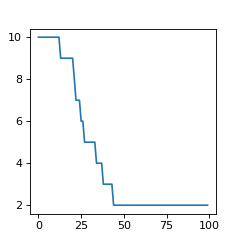

In [4]:
c = Const();
curve = model(c, show_dotses=True);
plt.figure(figsize=(3,3));
plt.plot(curve);